***

# 1. Importing Packages  

***


**Below are the packages we need to load, view and visualize any xls data into a pandas dataframe.**  


In [1]:
import numpy  as np             # easy to play with arrays etc.
import pandas as pd             # required to load and read data and put in dataframe.
import matplotlib.pyplot as plt # required for data visualization purposes.
import seaborn as sns           # required for data visualization purposes.
import plotly.plotly as py      # required for data visualization purposes.
import plotly.graph_objs as go  # required for data visualization purposes.
from IPython.display import display, HTML
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

***

# 2. Reading Data

***


**To read data in the form of .xls or comma seperated file, you need pd.read_excel(). http://gsociology.icaap.org/dataupload.html is source of data**  

In [2]:
excel_file = "data/causes_of_death.xlsx"
data = pd.read_excel(excel_file)
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755.0,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439.0,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010.0,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604.0,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213.0,32.0


* * *

# 3. Gathering Basic Info  

* * *


## A:   .info()
**To get basic info from the dataset, we use .info()**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10295 non-null object
Cause Name                 10295 non-null object
State                      10295 non-null object
Deaths                     10295 non-null float64
Age-adjusted Death Rate    10295 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 362.0+ KB


## B:   .dtypes()
**To get datatypes of each column, we can use .dtypes**  

In [4]:
print (data.dtypes)

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                     float64
Age-adjusted Death Rate    float64
dtype: object


## C:   .describe()
**To get more details about each column, we can use .describe()**  

In [5]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10296.000000,1.029500e+04,10295.000000
mean,2007.500000,1.532812e+04,128.033774
std,5.188379,1.112213e+05,224.364940
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.705000e+03,35.800000
75%,2012.000000,5.682000e+03,153.050000
max,2016.000000,2.712630e+06,1087.300000


## D:   .isnull().sum()
   
**We can check the number of null/empty values a column has by using .isnull().sum()**  

In [6]:
data.isnull().sum()

Year                       0
113 Cause Name             1
Cause Name                 1
State                      1
Deaths                     1
Age-adjusted Death Rate    1
dtype: int64

## E:   .nunique()
  
**It is useful to see the number of unique values in each column using .nunique()**  

In [7]:
data.nunique()

Year                         18
113 Cause Name               11
Cause Name                   11
State                        52
Deaths                     5741
Age-adjusted Death Rate    2419
dtype: int64

## F:   .value_counts()


In [8]:
data.Year.value_counts()

2015    572
2007    572
2008    572
2016    572
2001    572
2009    572
2002    572
2010    572
2003    572
2011    572
2004    572
2012    572
2005    572
2013    572
2006    572
2014    572
1999    572
2000    572
Name: Year, dtype: int64

***

# 4. Cleaning Data into Readable Format  

***
    
## A.   XLS cleaning
  
**This file doesn't require any cleaning so data will remain as is.**  

***

# 5. Manipulating Data  

***

## Groupby

**Here we see 'Age-adjusted Death Rate' a good number of unique values to order by, therefore we can group by this columns and make good visualizations**  

In [9]:
group1 = data.groupby("Cause Name")['Age-adjusted Death Rate'].agg(np.mean)
print (group1)

Cause Name
All causes                 800.924252
Alzheimer's disease         24.618697
CLRD                        44.644658
Cancer                     179.898825
Diabetes                    23.471902
Heart disease              199.782372
Influenza and pneumonia     18.389103
Kidney disease              14.139423
Stroke                      46.358333
Suicide                     13.235470
Unintentional injuries      42.817433
Name: Age-adjusted Death Rate, dtype: float64


***

# 6. Data Visualization  

***

**Using matplotlib.pyplot to make bar charts**

## A:   **General Plot**  
  
**Let us try to visualize all the data at once**  

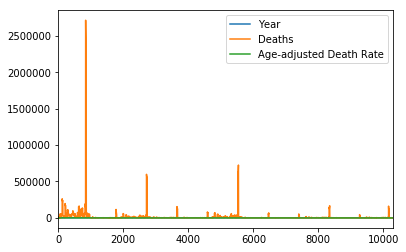

In [10]:
a = data.plot()
plt.show()

## B:   **Log Plot**  


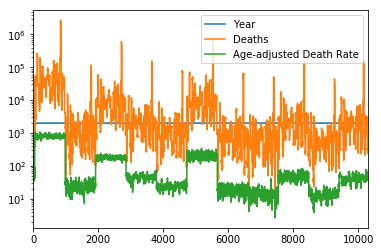

In [11]:
data.plot()
plt.yscale('log')

## C:   **Histogram**  

c:\users\mariam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\mariam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



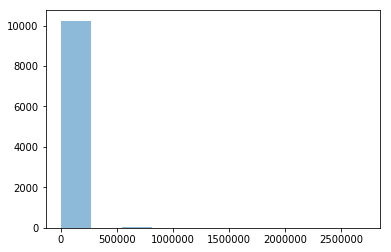

In [12]:
x = data["Deaths"]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)

## D:   **Scatter Plot**  


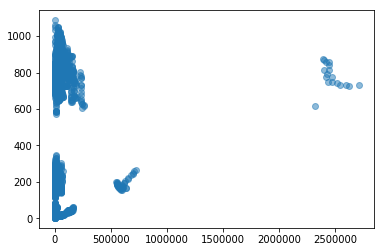

In [13]:
x = data['Deaths']
y = data['Age-adjusted Death Rate']
plt.scatter(x, y, alpha=0.5)

## E:   **Bar Graph**  
  
**A good way to visualize data of a column you wish to group by is to use .value_counts(). It gives a clear picture of how many would be in each group etc.**  

In [14]:
data['Cause_Name']=data['Cause Name']
print (data.Cause_Name.head())
region = data.Cause_Name.value_counts()
print (region)
climate = data.Year.value_counts()
print (climate)

0    Unintentional injuries
1    Unintentional injuries
2    Unintentional injuries
3    Unintentional injuries
4    Unintentional injuries
Name: Cause_Name, dtype: object
Cancer                     936
Heart disease              936
Diabetes                   936
All causes                 936
Stroke                     936
Influenza and pneumonia    936
Suicide                    936
CLRD                       936
Alzheimer's disease        936
Kidney disease             936
Unintentional injuries     935
Name: Cause_Name, dtype: int64
2015    572
2007    572
2008    572
2016    572
2001    572
2009    572
2002    572
2010    572
2003    572
2011    572
2004    572
2012    572
2005    572
2013    572
2006    572
2014    572
1999    572
2000    572
Name: Year, dtype: int64


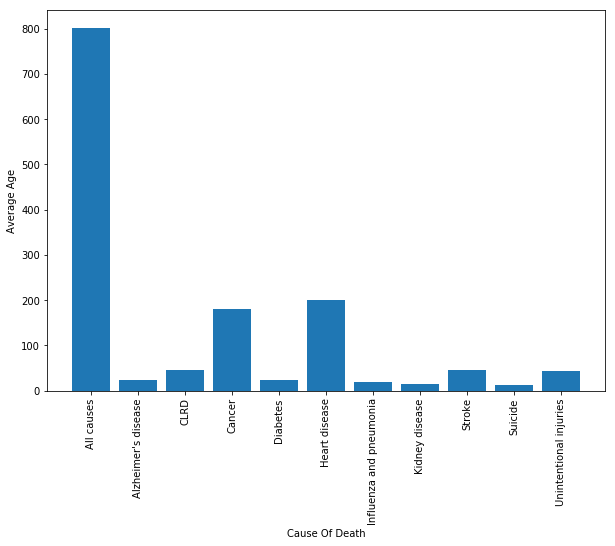

In [15]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),group1.values)
plt.xticks(np.arange(len(region.index)), group1.index)
plt.xticks(rotation=90)
plt.ylabel('Average Age')
plt.xlabel('Cause Of Death')
plt.show()

## F:   **Heatmap**  


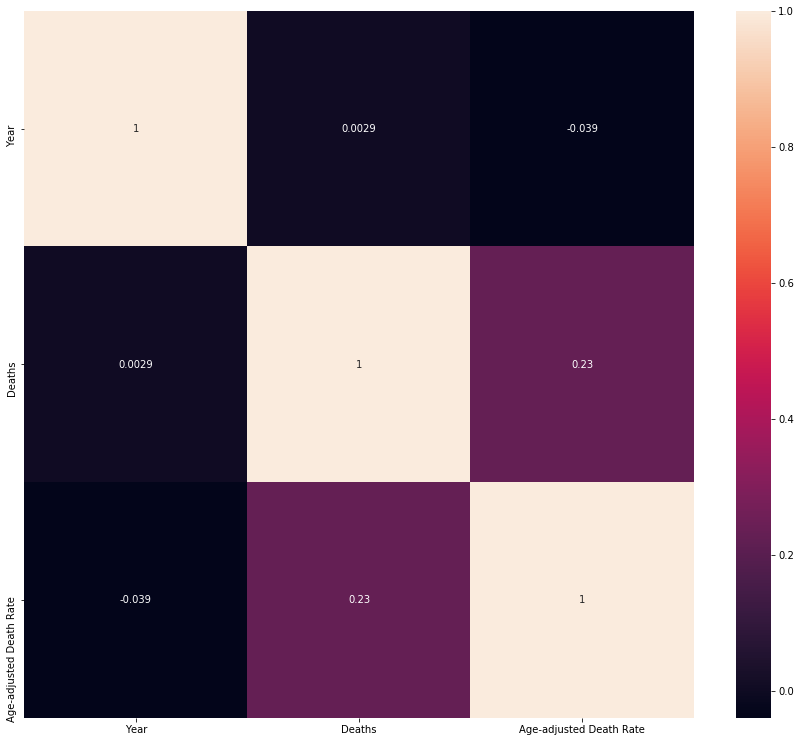

In [16]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()